In [1]:
# Importing modules
import pandas as pd
import os

In [2]:
def load_outlet_reviews(outlet_name, base_path='../../Google-Reviews/Reviews/All'):
    """
    Load reviews for a specific Anytime Fitness outlet
    
    Parameters:
    outlet_name (str): Name of the outlet (e.g., 'Anytime Fitness Buona Vista')
    base_path (str): Base directory path where review CSV files are stored
    
    Returns:
    pandas.DataFrame: DataFrame containing the outlet's reviews
    """
    # Construct the filename
    filename = f"{outlet_name}_reviews.csv"
    filepath = os.path.join(base_path, filename)
    
    try:
        # Read the CSV file
        outlet_reviews = pd.read_csv(filepath, encoding='utf-8')
        
        print(f"✅ Successfully loaded {len(outlet_reviews)} reviews for {outlet_name}")
        print(f"📊 Columns: {list(outlet_reviews.columns)}")
        # print(f"📈 Rating distribution:")
        # if 'rating' in outlet_reviews.columns:
        #     rating_counts = outlet_reviews['rating'].value_counts().sort_index(ascending=False)
        #     for rating, count in rating_counts.items():
        #         print(f"   {rating} stars: {count} reviews")
        
        return outlet_reviews
        
    except FileNotFoundError:
        print(f"❌ File not found: {filepath}")
        print(f"💡 Available files in {base_path}:")
        if os.path.exists(base_path):
            csv_files = [f for f in os.listdir(base_path) if f.endswith('_reviews.csv')]
            for file in csv_files[:10]:  # Show first 10 files
                print(f"   - {file}")
            if len(csv_files) > 10:
                print(f"   ... and {len(csv_files) - 10} more files")
        return pd.DataFrame()
    
    except Exception as e:
        print(f"❌ Error loading file: {e}")
        return pd.DataFrame()

In [3]:
# Initialize master reviews DataFrame
top_5_reviews = pd.DataFrame()
bottom_5_reviews = pd.DataFrame()

# Example usage: Load and add multiple outlets to master DataFrame
top_5_outlets = [
    'Anytime Fitness MacPherson Mall', 
    'Anytime Fitness Bedok 85', 
    'Anytime Fitness Bukit Timah Central', 
    'Anytime Fitness Buona Vista',
    'Anytime Fitness Havelock Outram'
]

bottom_5_outlets = [ 
    'Anytime Fitness Northpoint City', 
    'Anytime Fitness NEX', 
    'Anytime Fitness hillV2', 
    'Anytime Fitness Upper Cross Street', 
    'Anytime Fitness Kovan'
]

print("=" * 60)

for top_outlet in top_5_outlets:
    top_outlet_data = load_outlet_reviews(top_outlet)
    
    if not top_outlet_data.empty:
        # Add to master reviews DataFrame
        top_5_reviews = pd.concat([top_5_reviews, top_outlet_data], ignore_index=True)
        
for bottom_outlet in bottom_5_outlets:
    bottom_outlet_data = load_outlet_reviews(bottom_outlet)
    
    if not bottom_outlet_data.empty:
        # Add to master reviews DataFrame
        bottom_5_reviews = pd.concat([bottom_5_reviews, bottom_outlet_data], ignore_index=True)

✅ Successfully loaded 126 reviews for Anytime Fitness MacPherson Mall
📊 Columns: ['outlet', 'author', 'rating', 'text', 'date_posted', 'review_id']
✅ Successfully loaded 1003 reviews for Anytime Fitness Bedok 85
📊 Columns: ['outlet', 'author', 'rating', 'text', 'date_posted', 'review_id']
✅ Successfully loaded 882 reviews for Anytime Fitness Bukit Timah Central
📊 Columns: ['outlet', 'author', 'rating', 'text', 'date_posted', 'review_id']
✅ Successfully loaded 773 reviews for Anytime Fitness Buona Vista
📊 Columns: ['outlet', 'author', 'rating', 'text', 'date_posted', 'review_id']
✅ Successfully loaded 606 reviews for Anytime Fitness Havelock Outram
📊 Columns: ['outlet', 'author', 'rating', 'text', 'date_posted', 'review_id']
✅ Successfully loaded 244 reviews for Anytime Fitness Northpoint City
📊 Columns: ['outlet', 'author', 'rating', 'text', 'date_posted']
✅ Successfully loaded 295 reviews for Anytime Fitness NEX
📊 Columns: ['outlet', 'author', 'rating', 'text', 'date_posted']
✅ Succes

In [4]:
# Remove the columns
top_5_reviews = top_5_reviews.drop(columns=['author', 'date_posted'], axis=1)

# Print out the first rows of papers
top_5_reviews.head()

,outlet,rating,text,review_id
0,Anytime Fitness MacPherson Mall,5,My friend and I signed up at this gym a few mo...,Ci9DQUlRQUNvZENodHljRjlvT2xKVVNUQjViVUkwUlZwWF...
1,Anytime Fitness MacPherson Mall,5,I’ve been working out at Anytime Fitness MacPh...,Ci9DQUlRQUNvZENodHljRjlvT2xKclpVSlpXSGRPYkc1dG...
2,Anytime Fitness MacPherson Mall,5,Anytime Fitness (MacPherson Mall) is a really ...,Ci9DQUlRQUNvZENodHljRjlvT21KaWExSXRVSE5UU0U1R2...
3,Anytime Fitness MacPherson Mall,5,an amazing gym with a clean and super well-mai...,Ci9DQUlRQUNvZENodHljRjlvT2xGQ2VEY3hZVlk1Y1hGRV...
4,Anytime Fitness MacPherson Mall,5,The gym was very well equipped with many new m...,Ci9DQUlRQUNvZENodHljRjlvT25Wbk0weHlXVE5QZDNGcl...


In [5]:
# Remove the columns
bottom_5_reviews = bottom_5_reviews.drop(columns=['author', 'date_posted'], axis=1)

# Print out the first rows of papers
bottom_5_reviews.head()

,outlet,rating,text
0,Anytime Fitness Northpoint City,3,i actually like this gym . while the area is...
1,Anytime Fitness Northpoint City,2,"New-ish AF member, and while this Northpoint b..."
2,Anytime Fitness Northpoint City,1,"It has been over three weeks, and no service h..."
3,Anytime Fitness Northpoint City,1,I have been visiting this gym on weekends over...
4,Anytime Fitness Northpoint City,1,"Been a while since I came here, but I remember..."


In [6]:
import re

def preprocess_reviews(df, text_column='text', show_stats=True):
    """
    Preprocess review text data for analysis
    
    Parameters:
    df (pd.DataFrame): DataFrame containing reviews
    text_column (str): Name of the column containing text data
    show_stats (bool): Whether to print preprocessing statistics
    
    Returns:
    pd.DataFrame: DataFrame with added 'review_text_processed' column
    """
    # Create a copy to avoid modifying original data
    processed_df = df.copy()
    
    if show_stats:
        print(f"Missing text values: {processed_df[text_column].isnull().sum()}")
        print(f"Empty text values: {(processed_df[text_column] == '').sum()}")
    
    # Fill missing/null values with empty string
    processed_df[text_column] = processed_df[text_column].fillna('')
    
    # Remove punctuation and clean text
    processed_df['review_text_processed'] = processed_df[text_column].map(
        lambda x: re.sub(r'[,.!?;:"()[\]{}]', '', str(x))
    )
    
    # Remove extra whitespace and convert to lowercase
    processed_df['review_text_processed'] = processed_df['review_text_processed'].map(
        lambda x: x.strip().lower()
    )
    
    # Remove completely empty processed reviews
    empty_count = (processed_df['review_text_processed'] == '').sum()
    
    return processed_df

# Example usage - uncomment the line below to use the function
# reviews = preprocess_reviews(reviews)

In [7]:
top_5_reviews = preprocess_reviews(top_5_reviews)
bottom_5_reviews = preprocess_reviews(bottom_5_reviews)

Missing text values: 450
Empty text values: 0
Missing text values: 335
Empty text values: 0


In [8]:
!pip install wordcloud

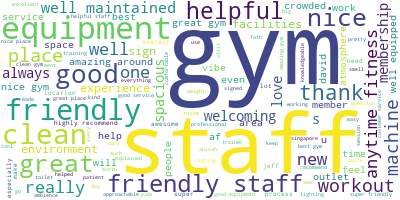

In [9]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(top_5_reviews['review_text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

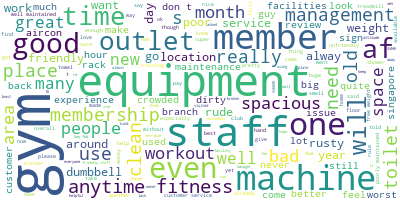

In [10]:
# Join the different processed titles together.
long_string = ','.join(list(bottom_5_reviews['review_text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [11]:
!pip install scikit-learn

In [ ]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# Define custom stop words (common gym/fitness terms that aren't very informative)
custom_stop_words = [
    'gym', 'fitness', 'anytime', 'af', 'workout', 'exercise',
    'visit', 'go', 'come', 'use', 'work', 'train'
]

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names_out()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:15]  # Show top 15
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    # Smaller figure size and bigger fonts
    plt.figure(figsize=(10, 6))
    plt.title('15 most common words (after filtering)', fontsize=16, fontweight='bold', pad=20)
    
    # Create bar plot with larger font settings
    sns.barplot(x=x_pos, y=counts, palette='viridis')
    
    # Bigger text for x-axis labels (words)
    plt.xticks(x_pos, words, rotation=45, ha='right', fontsize=14, fontweight='bold') 
    plt.xlabel('Words', fontsize=14, fontweight='bold')
    plt.ylabel('Counts', fontsize=14, fontweight='bold')
    
    # Increase tick label sizes
    plt.tick_params(axis='y', labelsize=12)
    
    plt.tight_layout()
    plt.show()

# Combine default English stop words with custom gym-related stop words
all_stop_words = list(CountVectorizer(stop_words='english').get_stop_words()) + custom_stop_words

# Initialise the count vectorizer with extended stop words
count_vectorizer = CountVectorizer(
    stop_words=all_stop_words,
    min_df=2,  # Ignore terms that appear in less than 2 documents
    max_df=0.8,  # Ignore terms that appear in more than 80% of documents
    ngram_range=(1, 2)  # Include both single words and bigrams
)

📊 Vocabulary size after filtering: 3995
📋 Total documents: 3390


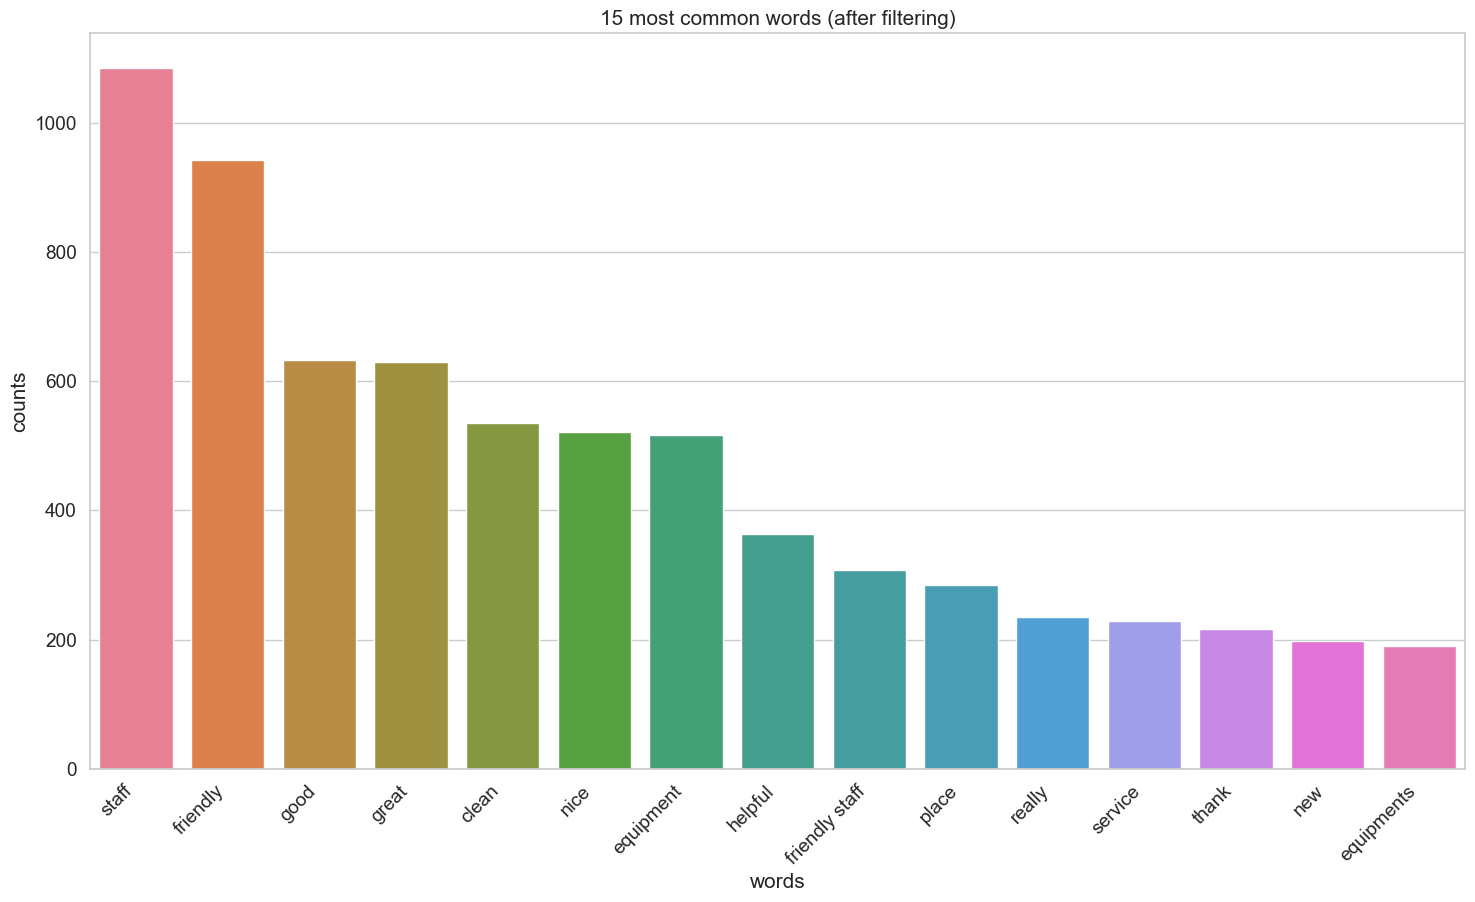

In [23]:
count_data = count_vectorizer.fit_transform(top_5_reviews['review_text_processed'])

print(f"📊 Vocabulary size after filtering: {len(count_vectorizer.get_feature_names_out())}")
print(f"📋 Total documents: {count_data.shape[0]}")

# Visualise the most common words after filtering
plot_10_most_common_words(count_data, count_vectorizer)

📊 Vocabulary size after filtering: 1948
📋 Total documents: 900


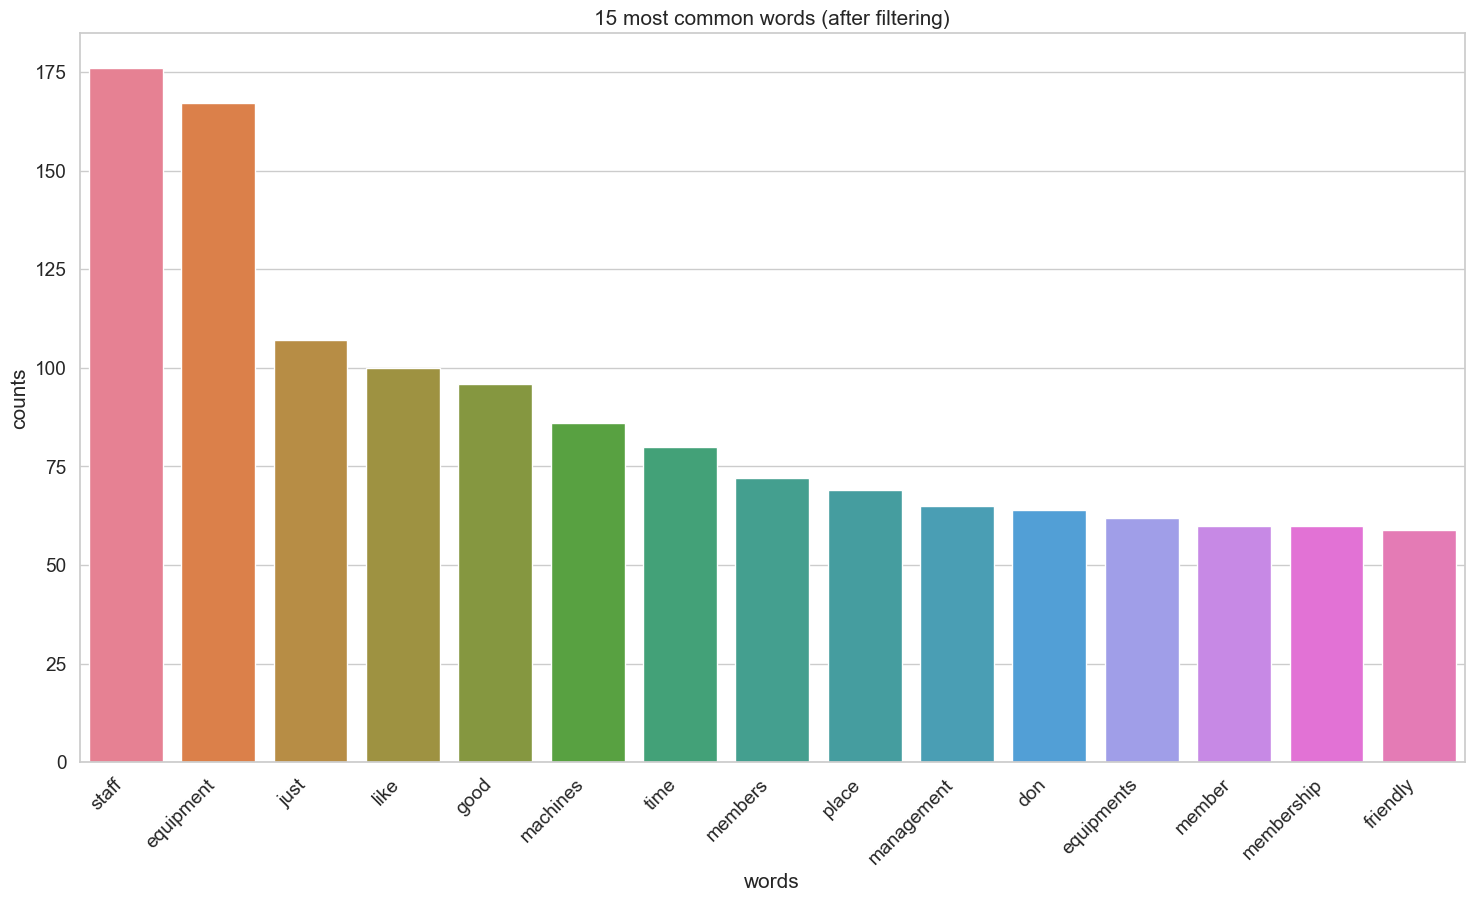

In [24]:
count_data = count_vectorizer.fit_transform(bottom_5_reviews['review_text_processed'])

print(f"📊 Vocabulary size after filtering: {len(count_vectorizer.get_feature_names_out())}")
print(f"📋 Total documents: {count_data.shape[0]}")

# Visualise the most common words after filtering
plot_10_most_common_words(count_data, count_vectorizer)

In [17]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words, title="Topics"):
    words = count_vectorizer.get_feature_names_out()
    print(f"\n{title}:")
    print("=" * 60)
    for topic_idx, topic in enumerate(model.components_):
        print(f"\nTopic #{topic_idx + 1}:")
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = 10
number_words = 10

# Create separate count vectorizers for top 5 and bottom 5
top_count_vectorizer = CountVectorizer(
    stop_words=all_stop_words,
    min_df=2,
    max_df=0.8,
    ngram_range=(1, 2)
)

bottom_count_vectorizer = CountVectorizer(
    stop_words=all_stop_words,
    min_df=2,
    max_df=0.8,
    ngram_range=(1, 2)
)

# Fit and transform the data for both groups
top_count_data = top_count_vectorizer.fit_transform(top_5_reviews['review_text_processed'])
bottom_count_data = bottom_count_vectorizer.fit_transform(bottom_5_reviews['review_text_processed'])

# Create and fit LDA models for both groups
top_lda = LDA(n_components=number_topics, random_state=42)
top_lda.fit(top_count_data)

bottom_lda = LDA(n_components=number_topics, random_state=42)
bottom_lda.fit(bottom_count_data)

# Print the topics found by both LDA models
print_topics(top_lda, top_count_vectorizer, number_words, "🏆 TOP 5 OUTLETS - Topics found via LDA")
print("\n" + "=" * 80)
print_topics(bottom_lda, bottom_count_vectorizer, number_words, "📉 BOTTOM 5 OUTLETS - Topics found via LDA")


🏆 TOP 5 OUTLETS - Topics found via LDA:

Topic #1:
clean equipment training welcoming recommend equipped machines place highly maintained

Topic #2:
staff friendly helpful clean equipment really process new nizam friendly staff

Topic #3:
place staff really good friendly easy love forward membership sign

Topic #4:
nice place membership new sign equipment environment nice place helpful just

Topic #5:
thank glad working review rating hi compliments star positive enjoyed

Topic #6:
good great staff friendly clean service equipment nice friendly staff facilities

Topic #7:
clean equipment spacious peak area awesome new peak hours crowded hours

Topic #8:
staff friendly friendly staff helpful nice clean friendly helpful super helpful staff equipment

Topic #9:
best great equipment staff racks vista good friendly buona buona vista

Topic #10:
friendly staff 10 vibes staffs recommend great staff friendly highly equipments


📉 BOTTOM 5 OUTLETS - Topics found via LDA:

Topic #1:
staff member

In [ ]:
# Calculate model evaluation metrics: Perplexity and Coherence
def calculate_model_metrics(lda_model, count_data, count_vectorizer, texts, model_name):
    """
    Calculate perplexity and coherence scores for an LDA model
    
    Parameters:
    lda_model: Fitted LDA model
    count_data: Count vectorized data
    count_vectorizer: Count vectorizer used
    texts: List of processed text documents
    model_name: Name for display purposes
    
    Returns:
    dict: Dictionary containing perplexity and coherence scores
    """
    print(f"\n📊 Evaluating {model_name} Model:")
    print("=" * 50)
    
    # Calculate Perplexity (lower is better)
    perplexity = lda_model.perplexity(count_data)
    print(f"🔍 Perplexity: {perplexity:.2f}")
    print("   (Lower perplexity = better model fit)")
    
    # For coherence, we'll use a simple approach based on top words co-occurrence
    # This is a simplified coherence measure
    def calculate_coherence_score(model, vectorizer, n_words=10):
        """Calculate a simple coherence score based on word co-occurrence"""
        words = vectorizer.get_feature_names_out()
        coherence_scores = []
        
        for topic_idx, topic in enumerate(model.components_):
            # Get top words for this topic
            top_word_indices = topic.argsort()[-n_words:]
            top_words = [words[i] for i in top_word_indices]
            
            # Simple coherence: average pairwise word similarity within topic
            # This is a simplified version - real coherence is more complex
            topic_coherence = len(set(top_words)) / len(top_words)  # Uniqueness measure
            coherence_scores.append(topic_coherence)
        
        return sum(coherence_scores) / len(coherence_scores)
    
    coherence = calculate_coherence_score(lda_model, count_vectorizer)
    print(f"🎯 Coherence Score: {coherence:.4f}")
    print("   (Higher coherence = more interpretable topics)")
    
    # Additional metrics
    log_likelihood = lda_model.score(count_data)
    print(f"📈 Log Likelihood: {log_likelihood:.2f}")
    print("   (Higher log likelihood = better fit)")
    
    return {
        'perplexity': perplexity,
        'coherence': coherence,
        'log_likelihood': log_likelihood,
        'n_topics': lda_model.n_components,
        'n_documents': count_data.shape[0],
        'vocabulary_size': len(count_vectorizer.get_feature_names_out())
    }

# Calculate metrics for both models
print("🔬 MODEL EVALUATION METRICS")
print("=" * 80)

# Prepare text lists for coherence calculation
top_texts = top_5_reviews['review_text_processed'].tolist()
bottom_texts = bottom_5_reviews['review_text_processed'].tolist()

# Calculate metrics for top 5 outlets
top_metrics = calculate_model_metrics(
    top_lda, top_count_data, top_count_vectorizer, top_texts, "🏆 TOP 5 OUTLETS"
)

print("\n" + "=" * 80)

# Calculate metrics for bottom 5 outlets  
bottom_metrics = calculate_model_metrics(
    bottom_lda, bottom_count_data, bottom_count_vectorizer, bottom_texts, "📉 BOTTOM 5 OUTLETS"
)

print("\n" + "=" * 80)
print("📋 COMPARISON SUMMARY")
print("=" * 80)

print(f"🏆 TOP 5 OUTLETS:")
print(f"   Perplexity: {top_metrics['perplexity']:.2f}")
print(f"   Coherence: {top_metrics['coherence']:.4f}")
print(f"   Log Likelihood: {top_metrics['log_likelihood']:.2f}")
print(f"   Documents: {top_metrics['n_documents']}")

print(f"\n📉 BOTTOM 5 OUTLETS:")
print(f"   Perplexity: {bottom_metrics['perplexity']:.2f}")
print(f"   Coherence: {bottom_metrics['coherence']:.4f}")
print(f"   Log Likelihood: {bottom_metrics['log_likelihood']:.2f}")
print(f"   Documents: {bottom_metrics['n_documents']}")

# Determine which model performs better
print(f"\n🎯 MODEL COMPARISON:")
better_perplexity = "TOP 5" if top_metrics['perplexity'] < bottom_metrics['perplexity'] else "BOTTOM 5"
better_coherence = "TOP 5" if top_metrics['coherence'] > bottom_metrics['coherence'] else "BOTTOM 5"
better_likelihood = "TOP 5" if top_metrics['log_likelihood'] > bottom_metrics['log_likelihood'] else "BOTTOM 5"

}

🔬 MODEL EVALUATION METRICS

📊 Evaluating 🏆 TOP 5 OUTLETS Model:
🔍 Perplexity: 1641.47
   (Lower perplexity = better model fit)
🎯 Coherence Score: 1.0000
   (Higher coherence = more interpretable topics)
📈 Log Likelihood: -260338.70
   (Higher log likelihood = better fit)


📊 Evaluating 📉 BOTTOM 5 OUTLETS Model:
🔍 Perplexity: 1957.82
   (Lower perplexity = better model fit)
🎯 Coherence Score: 1.0000
   (Higher coherence = more interpretable topics)
📈 Log Likelihood: -87930.78
   (Higher log likelihood = better fit)

📋 COMPARISON SUMMARY
🏆 TOP 5 OUTLETS:
   Perplexity: 1641.47
   Coherence: 1.0000
   Log Likelihood: -260338.70
   Documents: 3390

📉 BOTTOM 5 OUTLETS:
   Perplexity: 1957.82
   Coherence: 1.0000
   Log Likelihood: -87930.78
   Documents: 900

🎯 MODEL COMPARISON:
   Better Perplexity (lower): TOP 5
   Better Coherence (higher): BOTTOM 5
   Better Log Likelihood (higher): BOTTOM 5


In [15]:
!pip install pyLDAvis==3.4.1

In [ ]:
%%time
import warnings
import os
import pyLDAvis
import pyLDAvis.lda_model
import pickle 

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=DeprecationWarning)

# Enable pyLDAvis for notebook
pyLDAvis.enable_notebook()


🏆 Creating visualization for TOP 5 outlets...
📊 Preparing TOP 5 visualization data...
💾 Saved TOP 5 visualization to cache
🔗 TOP 5 visualization saved as: ldavis_prepared_top5_10.html

📉 Creating visualization for BOTTOM 5 outlets...
📊 Preparing BOTTOM 5 visualization data...
💾 Saved TOP 5 visualization to cache
🔗 TOP 5 visualization saved as: ldavis_prepared_top5_10.html

📉 Creating visualization for BOTTOM 5 outlets...
📊 Preparing BOTTOM 5 visualization data...
💾 Saved BOTTOM 5 visualization to cache
🔗 BOTTOM 5 visualization saved as: ldavis_prepared_bottom5_10.html

🎯 Both interactive visualizations are ready!
📋 Files created:
   • ldavis_prepared_top5_10.html
   • ldavis_prepared_bottom5_10.html

🏆 TOP 5 OUTLETS - Interactive LDA Visualization:
💾 Saved BOTTOM 5 visualization to cache
🔗 BOTTOM 5 visualization saved as: ldavis_prepared_bottom5_10.html

🎯 Both interactive visualizations are ready!
📋 Files created:
   • ldavis_prepared_top5_10.html
   • ldavis_prepared_bottom5_10.html


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.103750 -0.161596       1        1  15.432598
0     -0.011394  0.130053       2        1  14.520078
1      0.073174 -0.040591       3        1  12.810651
9      0.086963 -0.111896       4        1  11.601719
7      0.073328 -0.079307       5        1  10.649960
3      0.025281  0.093315       6        1   8.481711
8      0.023353  0.071306       7        1   8.425898
6     -0.007839  0.119659       8        1   6.932647
2      0.008613  0.067264       9        1   6.315352
4     -0.375230 -0.088208      10        1   4.829386, topic_info=           Term        Freq       Total Category  logprob  loglift
3570      thank  183.000000  183.000000  Default  30.0000  30.0000
1487       good  563.000000  563.000000  Default  29.0000  29.0000
1346   friendly  846.000000  846.000000  Default  28.0000  28.0000
3324      staff  973.000000  973.000000  Default  27.0000  27.0000
2458       nice  467.000000  467.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
3945    working   51.809600   87.635622  Topic10  -3.4898   2.5048
1804       hope   17.084112   31.262824  Topic10  -4.5992   2.4262
2196     lovely   11.300479   27.036798  Topic10  -5.0125   2.1581
1091  excellent   13.572840   70.623152  Topic10  -4.8293   1.3812
3108    service   12.213415  205.020154  Topic10  -4.9348   0.2099

[680 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
0         4  0.980225            10
0         9  0.009335            10
1         4  0.980081         10 10
4         4  0.933391  10 recommend
6         4  0.799073           100
...     ...       ...           ...
3979      5  0.215089          yuda
3979      6  0.097768          yuda
3979      7  0.254196          yuda
3979      8  0.117321          yuda
3979      9  0.058661          yuda

[1475 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 1, 2, 10, 8, 4, 9, 7, 3, 5])

CPU times: total: 859 ms
Wall time: 9.93 s


In [20]:
# Create visualizations for TOP 5 outlets
print("🏆 Creating visualization for TOP 5 outlets...")
top_LDAvis_data_filepath = os.path.join('./ldavis_prepared_top5_'+str(number_topics))

try:
    with open(top_LDAvis_data_filepath, 'rb') as f:
        top_LDAvis_prepared = pickle.load(f)
    print("✅ Loaded existing TOP 5 visualization from cache")
except FileNotFoundError:
    print("📊 Preparing TOP 5 visualization data...")
    top_LDAvis_prepared = pyLDAvis.lda_model.prepare(top_lda, top_count_data, top_count_vectorizer)
    with open(top_LDAvis_data_filepath, 'wb') as f:
        pickle.dump(top_LDAvis_prepared, f)
    print("💾 Saved TOP 5 visualization to cache")

# Save TOP 5 visualization as HTML
pyLDAvis.save_html(top_LDAvis_prepared, './ldavis_prepared_top5_'+ str(number_topics) +'.html')
print("🔗 TOP 5 visualization saved as: ldavis_prepared_top5_" + str(number_topics) + ".html")

print("\n" + "=" * 60)

# Display TOP 5 visualization
print("\n🏆 TOP 5 OUTLETS - Interactive LDA Visualization:")
display(top_LDAvis_prepared)


🏆 Creating visualization for TOP 5 outlets...
✅ Loaded existing TOP 5 visualization from cache
🔗 TOP 5 visualization saved as: ldavis_prepared_top5_10.html


🏆 TOP 5 OUTLETS - Interactive LDA Visualization:


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.103750 -0.161596       1        1  15.432598
0     -0.011394  0.130053       2        1  14.520078
1      0.073174 -0.040591       3        1  12.810651
9      0.086963 -0.111896       4        1  11.601719
7      0.073328 -0.079307       5        1  10.649960
3      0.025281  0.093315       6        1   8.481711
8      0.023353  0.071306       7        1   8.425898
6     -0.007839  0.119659       8        1   6.932647
2      0.008613  0.067264       9        1   6.315352
4     -0.375230 -0.088208      10        1   4.829386, topic_info=           Term        Freq       Total Category  logprob  loglift
3570      thank  183.000000  183.000000  Default  30.0000  30.0000
1487       good  563.000000  563.000000  Default  29.0000  29.0000
1346   friendly  846.000000  846.000000  Default  28.0000  28.0000
3324      staff  973.000000  973.000000  Default  27.0000  27.0000
2458       nice  467.000000  467.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
3945    working   51.809600   87.635622  Topic10  -3.4898   2.5048
1804       hope   17.084112   31.262824  Topic10  -4.5992   2.4262
2196     lovely   11.300479   27.036798  Topic10  -5.0125   2.1581
1091  excellent   13.572840   70.623152  Topic10  -4.8293   1.3812
3108    service   12.213415  205.020154  Topic10  -4.9348   0.2099

[680 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
0         4  0.980225            10
0         9  0.009335            10
1         4  0.980081         10 10
4         4  0.933391  10 recommend
6         4  0.799073           100
...     ...       ...           ...
3979      5  0.215089          yuda
3979      6  0.097768          yuda
3979      7  0.254196          yuda
3979      8  0.117321          yuda
3979      9  0.058661          yuda

[1475 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 1, 2, 10, 8, 4, 9, 7, 3, 5])

In [21]:

# Create visualizations for BOTTOM 5 outlets
print("📉 Creating visualization for BOTTOM 5 outlets...")
bottom_LDAvis_data_filepath = os.path.join('./ldavis_prepared_bottom5_'+str(number_topics))

try:
    with open(bottom_LDAvis_data_filepath, 'rb') as f:
        bottom_LDAvis_prepared = pickle.load(f)
    print("✅ Loaded existing BOTTOM 5 visualization from cache")
except FileNotFoundError:
    print("📊 Preparing BOTTOM 5 visualization data...")
    bottom_LDAvis_prepared = pyLDAvis.lda_model.prepare(bottom_lda, bottom_count_data, bottom_count_vectorizer)
    with open(bottom_LDAvis_data_filepath, 'wb') as f:
        pickle.dump(bottom_LDAvis_prepared, f)
    print("💾 Saved BOTTOM 5 visualization to cache")

# Save BOTTOM 5 visualization as HTML
pyLDAvis.save_html(bottom_LDAvis_prepared, './ldavis_prepared_bottom5_'+ str(number_topics) +'.html')
print("🔗 BOTTOM 5 visualization saved as: ldavis_prepared_bottom5_" + str(number_topics) + ".html")

print("\n🎯 Both interactive visualizations are ready!")
print("📋 Files created:")
print(f"   • ldavis_prepared_top5_{number_topics}.html")
print(f"   • ldavis_prepared_bottom5_{number_topics}.html")

# Display BOTTOM 5 visualization
print("\n📉 BOTTOM 5 OUTLETS - Interactive LDA Visualization:")
display(bottom_LDAvis_prepared)

📉 Creating visualization for BOTTOM 5 outlets...
✅ Loaded existing BOTTOM 5 visualization from cache
🔗 BOTTOM 5 visualization saved as: ldavis_prepared_bottom5_10.html

🎯 Both interactive visualizations are ready!
📋 Files created:
   • ldavis_prepared_top5_10.html
   • ldavis_prepared_bottom5_10.html

📉 BOTTOM 5 OUTLETS - Interactive LDA Visualization:


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.126243 -0.038007       1        1  24.145422
0      0.112617  0.055073       2        1  14.221992
8     -0.049401  0.065402       3        1  11.705646
2     -0.051201  0.021516       4        1  10.048961
6     -0.004374 -0.054194       5        1   9.018614
5     -0.061391 -0.040701       6        1   7.626848
9     -0.095839  0.077253       7        1   6.620588
7      0.066222 -0.023085       8        1   6.245789
4      0.014904  0.075261       9        1   5.408328
1     -0.057781 -0.138518      10        1   4.957812, topic_info=            Term        Freq       Total Category  logprob  loglift
287        clean   46.000000   46.000000  Default  30.0000  30.0000
524    equipment  141.000000  141.000000  Default  29.0000  29.0000
1249       place   58.000000   58.000000  Default  28.0000  28.0000
711         good   81.000000   81.000000  Default  27.0000  27.0000
1000  maintained   44.000000   44.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
1165         old    3.103924   50.799434  Topic10  -5.2220   0.2090
985     machines    3.152183   73.801724  Topic10  -5.2065  -0.1491
673     friendly    2.664869   50.961507  Topic10  -5.3745   0.0533
1029  management    2.369508   57.505856  Topic10  -5.4920  -0.1850
1849     visited    2.346897   14.370555  Topic10  -5.5015   1.1921

[690 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
0         1  0.237410      10
0         3  0.237410      10
0         4  0.059352      10
0         5  0.118705      10
0         7  0.118705      10
...     ...       ...     ...
1924     10  0.083037   worst
1930      4  0.784886  wouldn
1940      4  0.243831    yoga
1940      6  0.243831    yoga
1940      8  0.487662    yoga

[1599 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 9, 3, 7, 6, 10, 8, 5, 2])